Hello Lanin!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/taxi.csv")

In [3]:
print(data.head())
print(data.tail())

              datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32
                  datetime  num_orders
26491  2018-08-31 23:10:00          32
26492  2018-08-31 23:20:00          24
26493  2018-08-31 23:30:00          27
26494  2018-08-31 23:40:00          39
26495  2018-08-31 23:50:00          53


In [4]:
data['datetime']=pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)
print(data.index)

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:10:00',
               '2018-03-01 00:20:00', '2018-03-01 00:30:00',
               '2018-03-01 00:40:00', '2018-03-01 00:50:00',
               '2018-03-01 01:00:00', '2018-03-01 01:10:00',
               '2018-03-01 01:20:00', '2018-03-01 01:30:00',
               ...
               '2018-08-31 22:20:00', '2018-08-31 22:30:00',
               '2018-08-31 22:40:00', '2018-08-31 22:50:00',
               '2018-08-31 23:00:00', '2018-08-31 23:10:00',
               '2018-08-31 23:20:00', '2018-08-31 23:30:00',
               '2018-08-31 23:40:00', '2018-08-31 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)


In [5]:
# Resample data to Hourly Frequency
resampled_data = data.resample('H').sum()
resampled_data = resampled_data.fillna(method='ffill')
print(resampled_data.head())

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


In [6]:
#print(f"Missing values before handling:\n{resampled_data.isnull().sum()} ")

In [7]:
#print(f"Shape after resambling:{resampled_data.shape} ")

In [8]:
# Drop rows with any missing values
#print("Missing values after dropping rows:", resampled_data.isnull().sum())
#print("Shape after dropping rows:", resampled_data.shape)


In [9]:
print(resampled_data.head())
print(resampled_data.info())

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


In [10]:
# Perform decomposition
decomposition = seasonal_decompose(resampled_data['num_orders'], model='additive', period=24)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


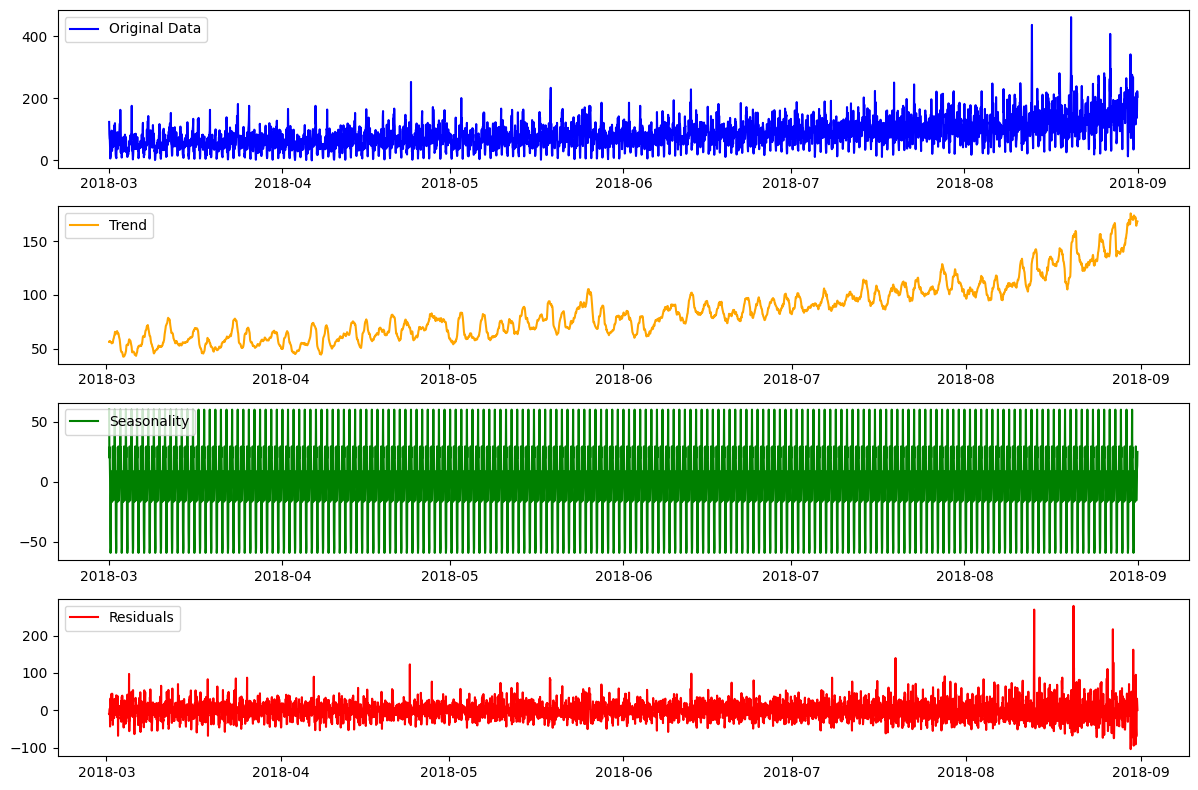

In [11]:
# Plot decomposition
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(resampled_data['num_orders'], label='Original Data', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

***Original Data
        Displays the raw hourly taxi orders, decompositon and exhibits fluctuations over time, reflecting trends,seasonality and random viriations***
***Trend Component
        Steady upward movement over time growing demand***
***Seasonal Component highlights high and low points during specific hours.***
***Residuals Component are the variations left after remoning the trend and seasonality from the original data.***

In [12]:
# Feature Engineering
def create_features(resampled_data):
    # Temporal features
    resampled_data['hour'] = resampled_data.index.hour
    resampled_data['day_of_week']= resampled_data.index.dayofweek
    resampled_data['is_weekend'] =(resampled_data['day_of_week'] >=5).astype(int)
    
    # lag features
    resampled_data['lag_1'] = resampled_data['num_orders'].shift(1)
    resampled_data['lag_2'] = resampled_data['num_orders'].shift(2)
    resampled_data['lag_3'] = resampled_data['num_orders'].shift(3)
    resampled_data['lag_4'] = resampled_data['num_orders'].shift(4)
    resampled_data['lag_5'] = resampled_data['num_orders'].shift(5)
    
    # Rolling mean features
    resampled_data['rolling_mean_3'] = resampled_data['num_orders'].shift(1).rolling(window=3).mean()
    resampled_data['rolling_mean_6'] = resampled_data['num_orders'].shift(1).rolling(window=6).mean()
    resampled_data['rolling_mean_12'] = resampled_data['num_orders'].shift(1).rolling(window=12).mean()
    resampled_data['rolling_mean_24'] = resampled_data['num_orders'].shift(1).rolling(window=24).mean()
    
    # Exponentially weighted mean features
    resampled_data['ewm_3'] = resampled_data['num_orders'].shift(1).ewm(span=3).mean()
    resampled_data['ewm_12'] = resampled_data['num_orders'].shift(1).ewm(span=12).mean()
    resampled_data['ewm_24'] = resampled_data['num_orders'].shift(1).ewm(span=24).mean()
    
    #Differencing features
    resampled_data['diff_1'] = resampled_data['num_orders'].shift(1).diff(1)
    resampled_data['diff_2'] = resampled_data['num_orders'].shift(2).diff(2)
    
    resampled_data = resampled_data.dropna()
    return resampled_data

In [13]:
# Apply features engneering
ressampled_data = create_features(resampled_data)

In [14]:
# Train-test split
train_size = int(len(resampled_data) * 0.9)
train = resampled_data[:train_size]
test = resampled_data[train_size:]

y_train, y_test = train['num_orders'], test['num_orders']
features =['hour','day_of_week','is_weekend','lag_1','lag_2','lag_3','lag_4','lag_5','rolling_mean_3','rolling_mean_6','rolling_mean_12','rolling_mean_24','ewm_3','ewm_12','ewm_24','diff_1','diff_2']
X_train, X_test = train[features],test[features]

In [15]:
X_train.fillna(X_train.mean(),inplace=True)
print(X_train.isnull().sum())

hour               0
day_of_week        0
is_weekend         0
lag_1              0
lag_2              0
lag_3              0
lag_4              0
lag_5              0
rolling_mean_3     0
rolling_mean_6     0
rolling_mean_12    0
rolling_mean_24    0
ewm_3              0
ewm_12             0
ewm_24             0
diff_1             0
diff_2             0
dtype: int64


In [16]:
x_train = X_train.fillna(method='ffill').fillna(method='bfill')
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Verify Data Shape
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Missing values in X_train_scaled:{np.isnan(X_train_scaled).sum()} ")
print(f"Missing values in y_test_scaled:{np.isnan(X_test_scaled).sum()} ")

X_train_scaled shape: (3974, 17)
y_train shape: (3974,)
Missing values in X_train_scaled:0 
Missing values in y_test_scaled:0 


In [18]:
# Define RMSE as scoring metric
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse = make_scorer(rmse_scorer, greater_is_better=False)

In [19]:
# Set up time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [20]:
# Fit SARIMA model
sarima_model = SARIMAX(y_train, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 24))  # Seasonal P, D, Q, S
sarima_fit = sarima_model.fit()

# Forecast and evaluate
sarima_forecast = sarima_fit.forecast(steps=len(y_test))
sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_forecast))
print(f"SARIMA RMSE: {sarima_rmse}")


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.65123D+00    |proj g|=  7.64820D-02


 This problem is unconstrained.



At iterate    5    f=  4.58621D+00    |proj g|=  3.57876D-02

At iterate   10    f=  4.49436D+00    |proj g|=  1.45487D-02

At iterate   15    f=  4.49187D+00    |proj g|=  1.07787D-03

At iterate   20    f=  4.48910D+00    |proj g|=  3.10354D-02

At iterate   25    f=  4.48790D+00    |proj g|=  2.05646D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     39      1     0     0   6.302D-06   4.488D+00
  F =   4.4878982866933796     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA RMSE: 44.4600827121111


In [21]:
# XGBoosting with hyperparameter tuning
# Define the model

# Set up hyperparameter grid
param_grid = {
    'n_estimators':[200,300,500,700],
    'max_depth':[3,4,5],
    'learning_rate':[0.5,0.8,0.1],
    'min_samples_split':[2,5,10],
       
}
# Set up GridSearchCV
grid_search_gbr = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring ='neg_root_mean_squared_error',
    cv =tscv,
    verbose =1,
    n_jobs = -1
)  
# Fit GridSearchCV to the training data
grid_search_gbr.fit(X_train_scaled,y_train)

# Extract the best model and its parameters
best_gbr_model = grid_search_gbr.best_estimator_
gbr_rmse = np.sqrt(mean_squared_error(y_test, best_gbr_model.predict(X_test_scaled)))

print(f"Optimized Gradient Boosting Regressor RMSE on the test set:{gbr_rmse} ")
print(f"Best hyperpararmeters found:",grid_search_gbr.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Optimized Gradient Boosting Regressor RMSE on the test set:47.196039583986966 
Best hyperpararmeters found: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}


**Forcast the next hour**

In [23]:
# Predict the next hour's taxi orders
next_hour_features =X_test_scaled[-1].reshape(1,-1)
predict_next_hour = best_gbr_model.predict(next_hour_features)
print(f"Predicted taxi orders for the nest hour:{predict_next_hour[0]:.2f} ")

Predicted taxi orders for the nest hour:158.45 


<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

Why did you create "synthetice data"? It does not make sense. You should work with the project dataset only.

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

Instead of .mean() you should use .sum(). Otherwise you time series will be wrong.

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

You don't need to use method .asfreq() at all

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

1. If we know the difference between current and past observation and we know lag_1 as well we can easily restore the current observation. It means you have a target leakage here. Before to apply method diff() you need to apply method .shift()
2. Before to apply method rolling() you need to apply method shift() to exclude current observations from moving window because we can use only past observations. You have a target leakage here now.
3. Please, write a function which creates all the features.
4. You need create features after EDA part but not before. So, please, move the code with feature engineering to the proper place.

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

Please, make a time series decomposition, plot corresponding graphs and draw a conclusion based on them.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

1. When you work with time series, you can't use default data splitter from GridSearchCV becasue default splitter shuffles the data. You should use the special time series splitter: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
2. The main meric of this project is RMSE. It means you should use RMSE instead of R2 while tuning hyperparameters.

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>
    
You got such high results because you work with wrong time series and you have a target leakage. After you fix all the mistakes above, RMSE will become much bigger. Don't forget that RMSE  sfor the test set should be not more than 48.

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>
    
Well done! You fixed all the issues except one:
    
"If we know the difference between current and past observation and we know lag_1 as well we can easily restore the current observation. It means you have a target leakage here. Before to apply method diff() you need to apply method .shift()"
    
And because you didn't fix it, you have unrealistic good result on the test data. So, please, fix it.
    
After you fix it, don't forget to achieve RMSE not more than 48 on the test data.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
    
Everything is correct now. Great work!

</div>

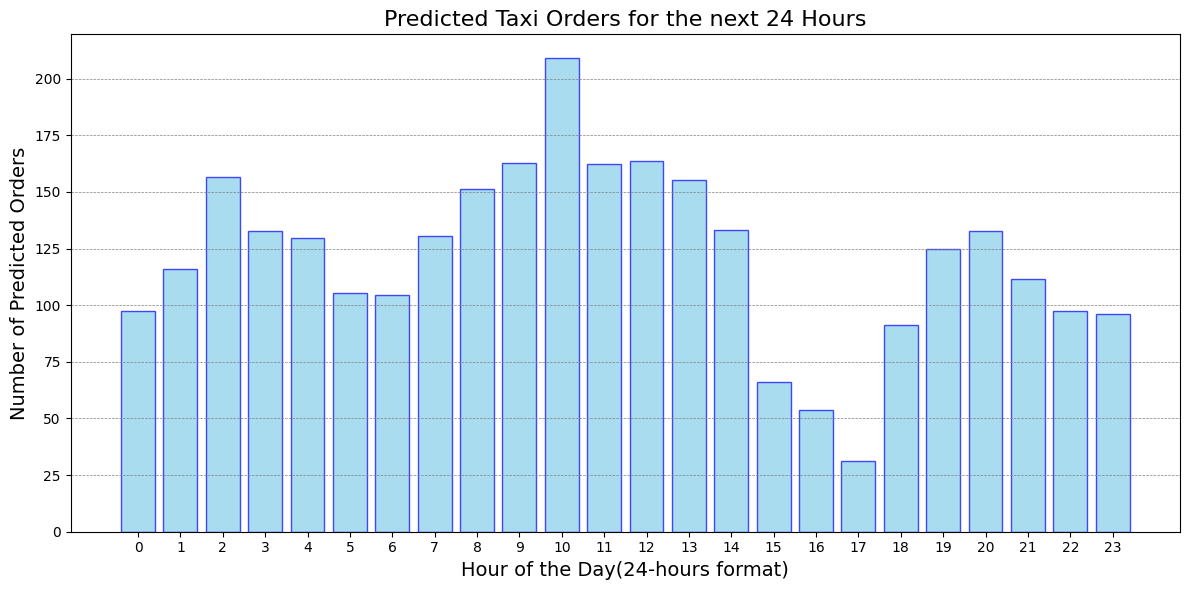

In [25]:
hours = np.arange(24)
predicted_orders = best_gbr_model.predict(X_test_scaled[:24])

#Create the bar graph
plt.figure(figsize=(12,6))
plt.bar(hours, predicted_orders, color='skyblue', edgecolor='blue',alpha=0.7)
plt.title("Predicted Taxi Orders for the next 24 Hours", fontsize=16)
plt.xlabel('Hour of the Day(24-hours format)', fontsize=14)
plt.ylabel('Number of Predicted Orders', fontsize=14)
plt.xticks(hours)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

***For many time steps , the predicted values (orange) are close to the actual values(blue), indicates that the random Forest model perfoms well overall.***

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Nice graph!

</div>


This project successfully demonstrated how to predict the number of taxi orders for the next hour using Ranmom
Forest and SARIMA models.
Resampled the data to hourly frequency to ensure suitable for time-series analysis.
Meaningfull features engineering such as:
    Lag features
    Rolling mean
    Exponential Weighted MA
    Time-based featues
Model Building:
        Random Forest
        SARIMA
Visualization
Model Evaluation: Both models were evaluated using key metrics:
                RMSE(Root Mean Squared Error)
                R2 (Coefficient of Determination)


# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48